In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import copy

In [2]:
# Define the stock symbols
symbols = ["AAPL", "INFY.NS", "GOOGL", "MSFT", "ADANIGREEN.NS", "RELIANCE.NS", "TSLA", "SPCE", "AMZN", "NFLX"]

# Fetch historical stock data
dataframes = {}  # Dictionary to store dataframes

for symbol in symbols:
    try:
        data = yf.download(symbol, start="2013-01-01", end="2023-01-01")
        dataframes[symbol] = data
    except Exception as e:
        print(f"Error fetching data for symbol {symbol}: {str(e)}")


ndataframes=copy.deepcopy(dataframes)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
def detect_ascending_triangle(df):
    triangle = (df['High'].rolling(window=10).max() <= df['High']) & (df['Low'].rolling(window=10).min() >= df['Low'].shift(1))
    asc_tri_pat_indices= np.where(triangle)
    return asc_tri_pat_indices



In [4]:
def bear_flag(data):
    bear_index = []

    for i in range(1, len(data)):
        current_high = data.loc[i, 'High']
        prev_high = data.loc[i - 1, 'High']
        current_low = data.loc[i, 'Low']
        prev_low = data.loc[i - 1, 'Low']
        current_close = data.loc[i, 'Close']
        prev_close = data.loc[i - 1, 'Close']

        if current_high < prev_high and current_low > prev_low and current_close < prev_close:
            bear_index.append(i)

    return bear_index


In [5]:
def cup_and_handle(df):
    cup_handle_indices = []
    sma50 = calculate_sma(df['Close'], window=50)
    sma200 = calculate_sma(df['Close'], window=200)
    for i in range(50, len(df)):
        if i < len(sma50) and i < len(sma200):  # Check if i is within the list bounds
            if (df.loc[i, 'Close'] > sma50[i]) and (sma50[i] > sma200[i]):
                window_start = max(0, i - 25)  # Ensure window start index is not negative
                window_end = min(len(df) - 1, i + 25)  # Ensure window end index is within DataFrame length
                if df.loc[i, 'Close'] == calculate_max_rolling(df['Close'], window_start, window_end):
                    cup_handle_indices.append(i)

    return cup_handle_indices


In [6]:
def calculate_sma(values, window):
    sma = []
    for i in range(window-1, len(values)):
        sma.append(sum(values[i-window+1:i+1]) / window)
    return sma


In [7]:
def calculate_max_rolling(values, start, end):
    max_val = float('-inf')
    for i in range(start, end+1):
        if values[i] > max_val:
            max_val = values[i]
    return max_val

In [8]:
def rounding_top(df):
    sma_period = 20
    roc_period = 10

    sma = calculate_sma(df['Close'], sma_period)
    roc = calculate_roc(df['Close'], roc_period)

    rounding_top_indices = []
    rounded_top_data = pd.DataFrame(index=df.index, columns=['Pattern'])

    for i in range(1, len(df) - 1 - roc_period):
        if roc[i] > 0 and roc[i - 1] > 0 and roc[i + 1] > 0:
            rounding_top_indices.append(i)

        rounded_top_data.loc[i, 'Pattern'] = int(roc[i] > 0 and roc[i - 1] > 0 and roc[i + 1] > 0)

    return rounding_top_indices


In [9]:
def calculate_roc(values, period):
    roc = []
    for i in range(period, len(values)):
        roc_value = (values[i] - values[i - period]) / values[i - period]
        roc.append(roc_value)
    return roc

In [10]:
def head_and_shoulders(df):
    peaks = []
    valleys = []
    left_shoulder = []
    right_shoulder = []
    head_and_shoulders = []

    for i in range(1, len(df) - 1):
        if df['High'][i + 1] < df['High'][i] and df['High'][i - 1] < df['High'][i]:
            peaks.append(True)
        else:
            peaks.append(False)

        if df['Low'][i + 1] > df['Low'][i] and df['Low'][i - 1] > df['Low'][i]:
            valleys.append(True)
        else:
            valleys.append(False)

    for i in range(2, len(df) - 3):
        if (peaks[i - 1] and valleys[i]) or (peaks[i] and valleys[i - 1]):
            left_shoulder.append(True)
        else:
            left_shoulder.append(False)

        if (peaks[i + 1] and valleys[i]) or (peaks[i] and valleys[i + 1]):
            right_shoulder.append(True)
        else:
            right_shoulder.append(False)

        if i >= 3 and left_shoulder[i - 2] and peaks[i] and right_shoulder[i - 3]:
            head_and_shoulders.append(True)
        else:
            head_and_shoulders.append(False)

    pattern_indices = []
    for i in range(len(head_and_shoulders)):
        if head_and_shoulders[i]:
            pattern_indices.append(i)

    return pattern_indices


The ascending triangle indices of AAPL are 
 DatetimeIndex(['2013-07-24', '2016-07-27', '2016-09-13', '2017-03-28',
               '2017-06-02', '2019-03-11', '2019-11-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


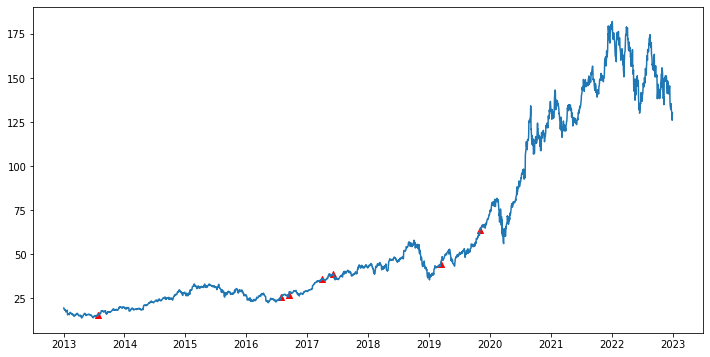

The ascending triangle indices of INFY.NS are 
 DatetimeIndex(['2013-05-31', '2014-01-06', '2014-04-15', '2014-10-13',
               '2015-01-12', '2016-10-13', '2017-07-31', '2017-10-26',
               '2019-10-11'],
              dtype='datetime64[ns]', name='Date', freq=None)


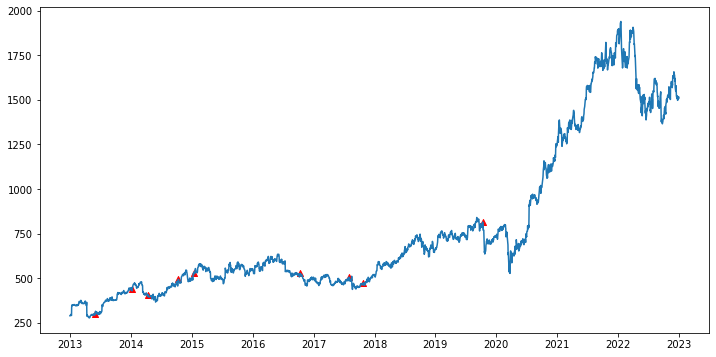

The ascending triangle indices of GOOGL are 
 DatetimeIndex(['2013-01-23', '2013-04-19', '2016-04-13', '2018-09-25',
               '2019-07-26', '2019-12-04', '2020-01-02', '2020-04-06',
               '2021-12-07'],
              dtype='datetime64[ns]', name='Date', freq=None)


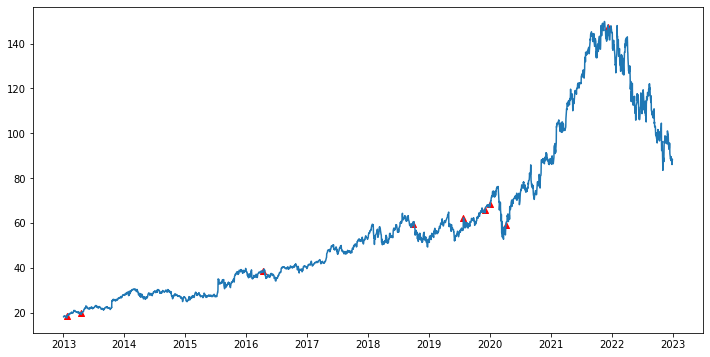

The ascending triangle indices of MSFT are 
 DatetimeIndex(['2013-10-25', '2017-08-14', '2019-07-19', '2020-06-30'], dtype='datetime64[ns]', name='Date', freq=None)


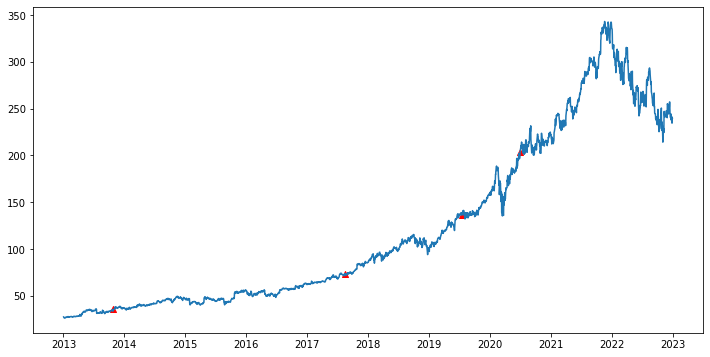

The ascending triangle indices of ADANIGREEN.NS are 
 DatetimeIndex(['2018-07-20', '2021-03-22'], dtype='datetime64[ns]', name='Date', freq=None)


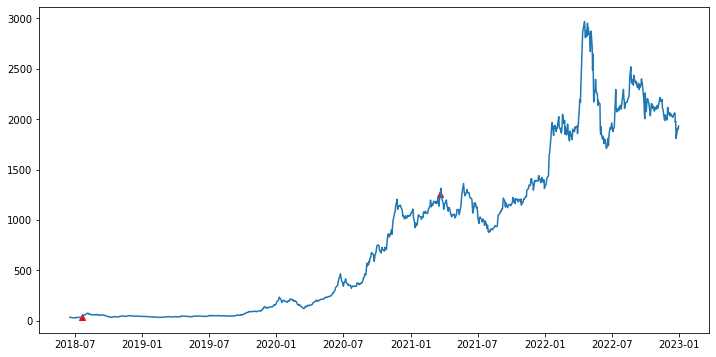

The ascending triangle indices of RELIANCE.NS are 
 DatetimeIndex(['2017-02-14', '2019-09-20', '2020-06-15', '2022-11-29'], dtype='datetime64[ns]', name='Date', freq=None)


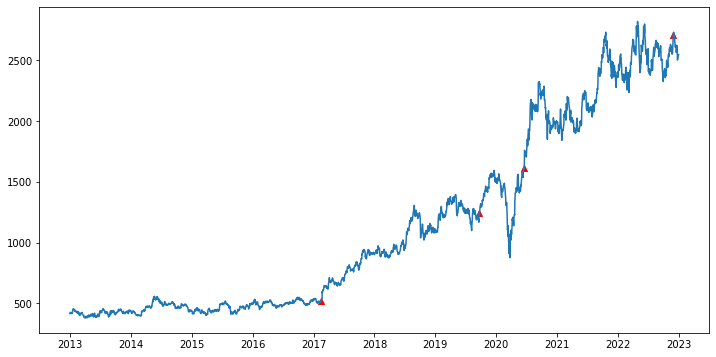

The ascending triangle indices of TSLA are 
 DatetimeIndex(['2014-01-15', '2016-10-03', '2017-03-14', '2017-08-03',
               '2019-02-27', '2020-08-12'],
              dtype='datetime64[ns]', name='Date', freq=None)


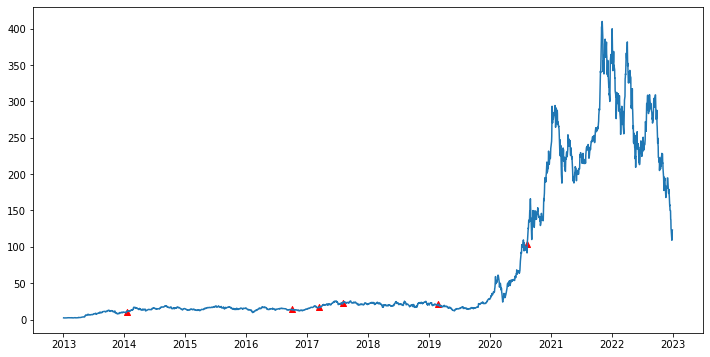

The ascending triangle indices of SPCE are 
 DatetimeIndex(['2017-11-30', '2018-10-31', '2018-11-23', '2018-12-11',
               '2019-05-31', '2019-06-03', '2021-09-30', '2022-02-15'],
              dtype='datetime64[ns]', name='Date', freq=None)


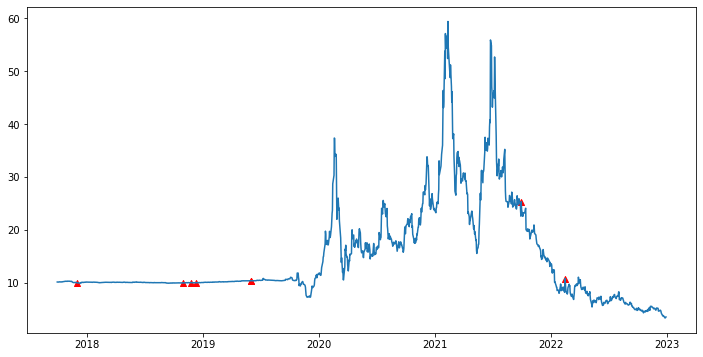

The ascending triangle indices of AMZN are 
 DatetimeIndex(['2016-04-29'], dtype='datetime64[ns]', name='Date', freq=None)


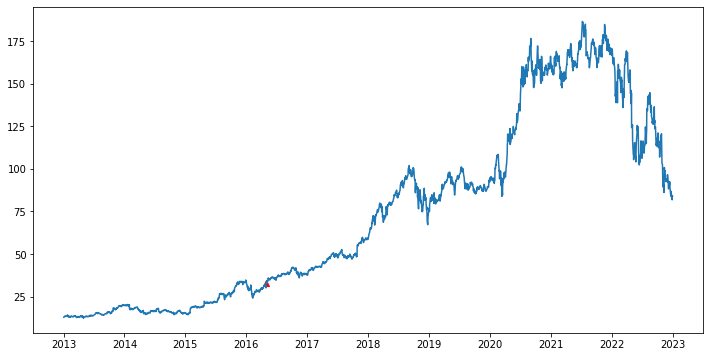

The ascending triangle indices of NFLX are 
 DatetimeIndex(['2015-11-17', '2016-01-07', '2017-12-28', '2020-01-23',
               '2020-12-29', '2021-10-21'],
              dtype='datetime64[ns]', name='Date', freq=None)


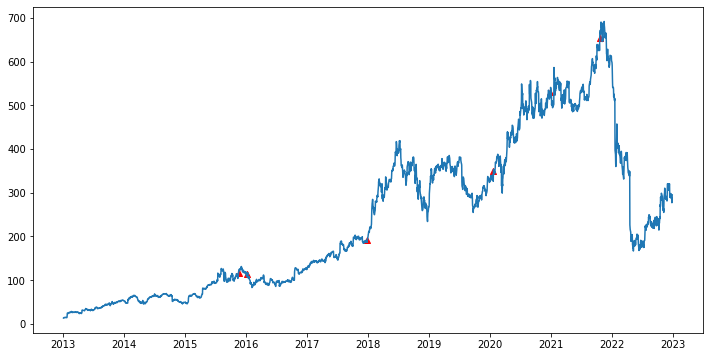

In [11]:
for symbol in symbols:
    index = detect_ascending_triangle(dataframes[symbol])
    print(f'The ascending triangle indices of {symbol} are \n',dataframes[symbol].index[index])

    plt.figure(figsize=(12,6))
    plt.plot(ndataframes[symbol]['Close'])
    plt.scatter(ndataframes[symbol].index[index], ndataframes[symbol]['Close'].iloc[index], marker='^', color='r')
    plt.show()



The bear flag indices of AAPL are 
 Index([   7,   20,   30,   39,   47,   53,   82,   96,  141,  162,
       ...
       2192, 2224, 2229, 2284, 2287, 2291, 2359, 2411, 2424, 2475],
      dtype='int64', length=123)


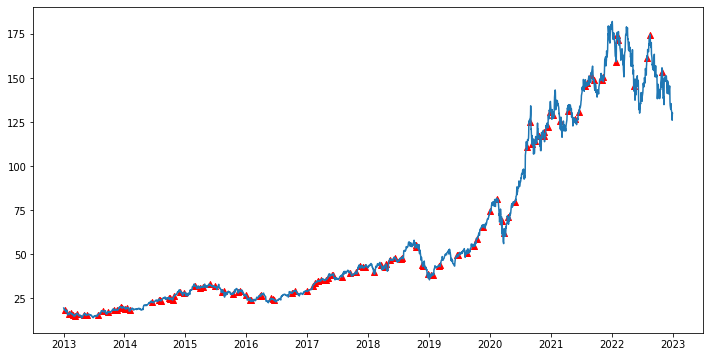

The bear flag indices of INFY.NS are 
 Index([  10,   15,   19,   25,   59,   73,  100,  124,  151,  161,
       ...
       2276, 2299, 2305, 2320, 2325, 2331, 2341, 2355, 2406, 2413],
      dtype='int64', length=159)


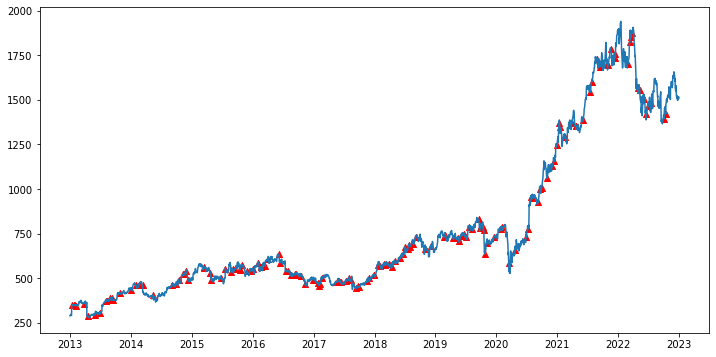

The bear flag indices of GOOGL are 
 Index([   3,    7,   10,   22,  135,  140,  152,  200,  207,  211,
       ...
       2313, 2322, 2325, 2331, 2359, 2372, 2438, 2475, 2485, 2493],
      dtype='int64', length=140)


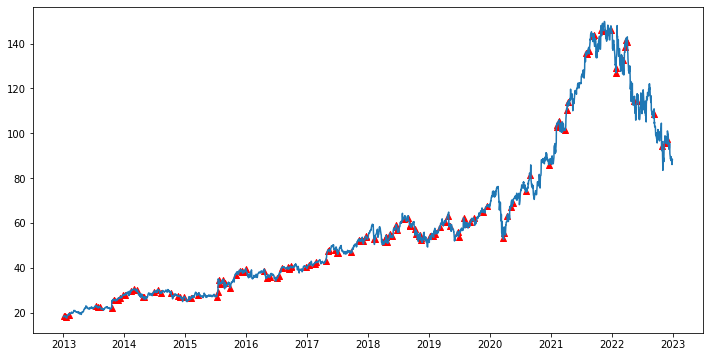

The bear flag indices of MSFT are 
 Index([   1,   10,   39,   65,   76,   82,  101,  109,  132,  143,
       ...
       2350, 2365, 2372, 2375, 2422, 2458, 2475, 2487, 2503, 2517],
      dtype='int64', length=139)


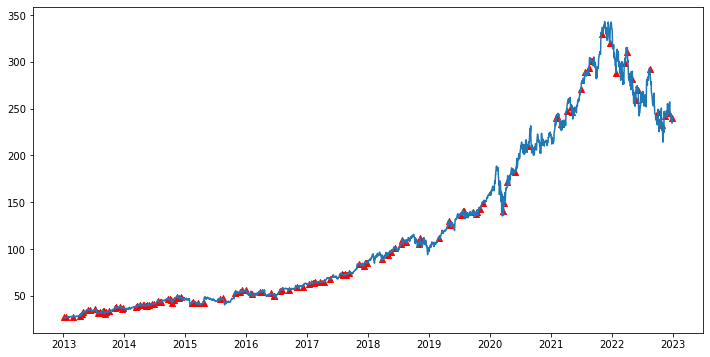

The bear flag indices of ADANIGREEN.NS are 
 Index([  18,   29,   40,   63,  124,  134,  185,  205,  206,  230,  231,  235,
        272,  277,  285,  304,  312,  314,  328,  336,  347,  400,  404,  411,
        459,  505,  509,  516,  528,  553,  555,  568,  604,  609,  613,  643,
        648,  651,  653,  655,  666,  671,  701,  711,  724,  736,  747,  755,
        763,  774,  817,  827,  837,  896,  900,  926,  929,  946,  980,  984,
        999, 1007, 1015, 1025, 1038, 1049, 1060, 1104, 1113],
      dtype='int64')


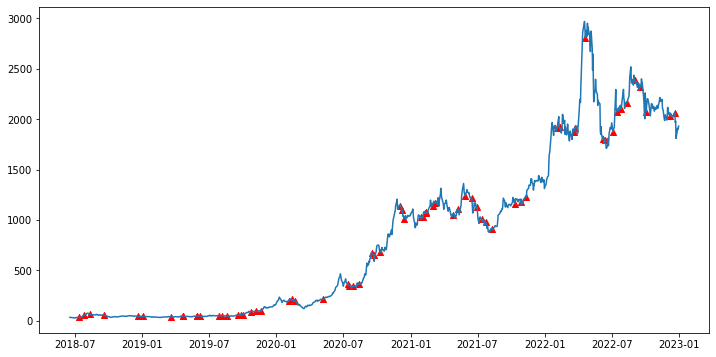

The bear flag indices of RELIANCE.NS are 
 Index([  56,  107,  121,  143,  152,  173,  193,  200,  264,  275,
       ...
       2133, 2142, 2178, 2194, 2215, 2237, 2272, 2280, 2324, 2466],
      dtype='int64', length=116)


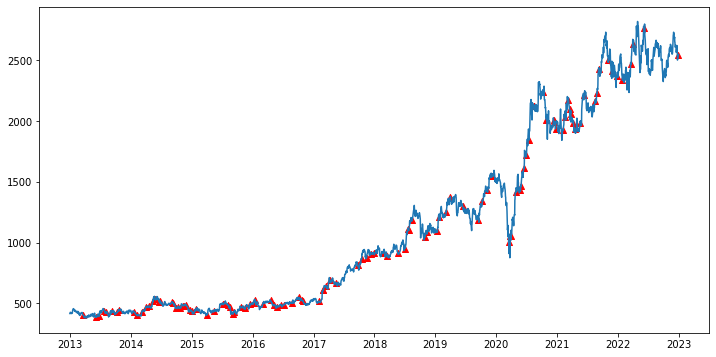

The bear flag indices of TSLA are 
 Index([   5,   16,   18,   19,   30,   52,   59,   72,   95,  109,
       ...
       2225, 2242, 2266, 2324, 2327, 2334, 2338, 2424, 2458, 2485],
      dtype='int64', length=152)


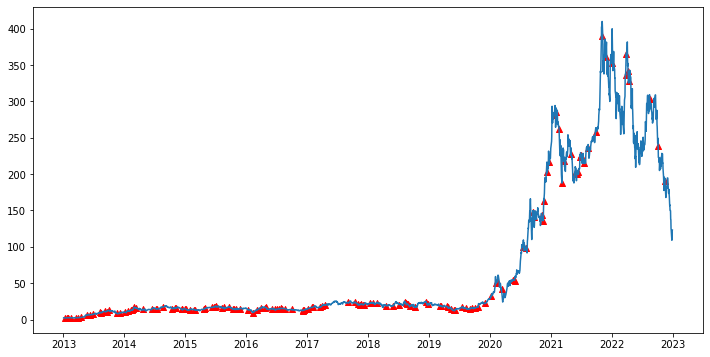

The bear flag indices of SPCE are 
 Index([   1,   21,   52,   54,  102,  112,  137,  172,  189,  205,  211,  222,
        246,  350,  370,  406,  493,  495,  529,  537,  570,  591,  601,  620,
        639,  651,  652,  668,  673,  676,  686,  695,  723,  725,  726,  741,
        745,  749,  765,  774,  786,  803,  810,  815,  848,  871,  899,  904,
        909,  918,  939,  944,  949,  956,  966,  987, 1036, 1038, 1047, 1063,
       1071, 1073, 1093, 1103, 1132, 1139, 1143, 1177, 1204, 1286, 1298, 1303],
      dtype='int64')


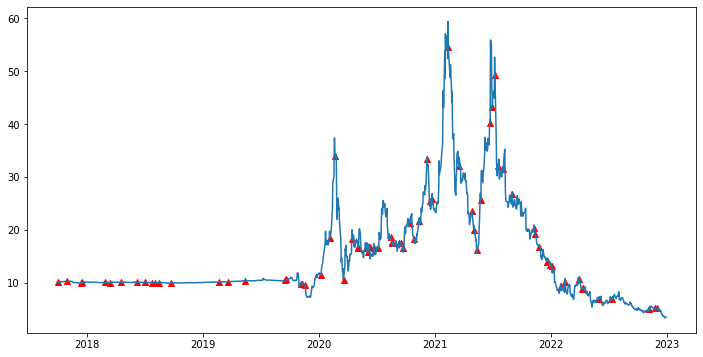

The bear flag indices of AMZN are 
 Index([   4,    9,   43,   92,  105,  143,  147,  153,  186,  202,
       ...
       2375, 2395, 2412, 2415, 2458, 2480, 2485, 2493, 2503, 2514],
      dtype='int64', length=137)


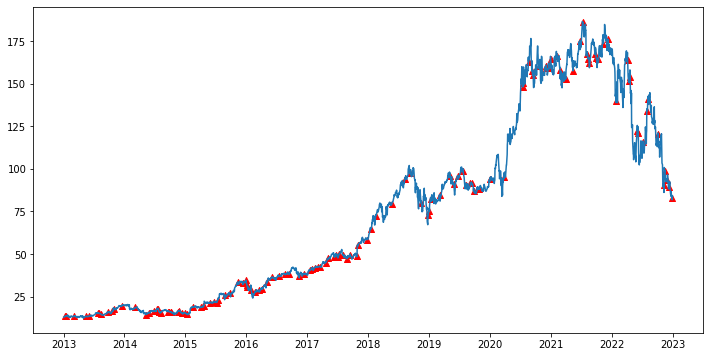

The bear flag indices of NFLX are 
 Index([   2,    4,    9,   26,   49,   59,   67,   74,   78,   86,
       ...
       2399, 2438, 2450, 2468, 2470, 2473, 2487, 2493, 2512, 2513],
      dtype='int64', length=181)


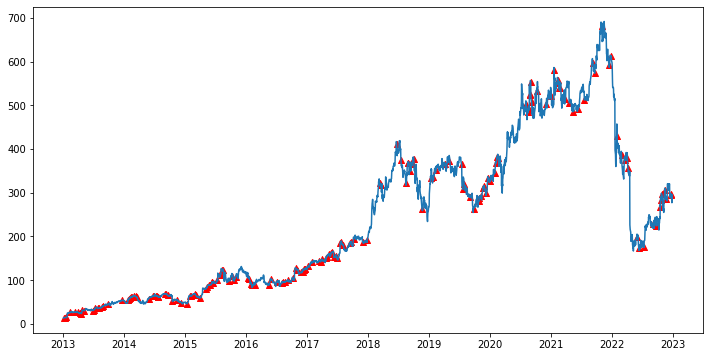

In [12]:
for symbol in symbols:
    dataframes[symbol].reset_index(drop=True, inplace=True)
    index = bear_flag(dataframes[symbol])
    print(f'The bear flag indices of {symbol} are \n',dataframes[symbol].index[index])

    plt.figure(figsize=(12,6))
    plt.plot(ndataframes[symbol]['Close'])
    plt.scatter(ndataframes[symbol].index[index], ndataframes[symbol]['Close'].iloc[index], marker='^', color='r')
    plt.show()



 cup_and_handleAAPL are 
 Index([538, 582, 640, 715, 1366, 1449, 2267], dtype='int64')


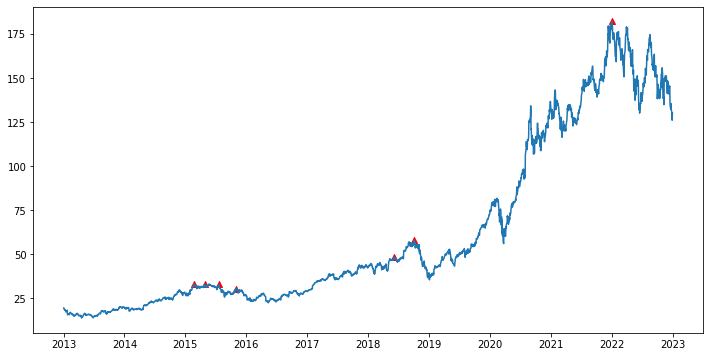

 cup_and_handleINFY.NS are 
 Index([525, 761, 800, 837, 975, 1039, 1644, 2168, 2230], dtype='int64')


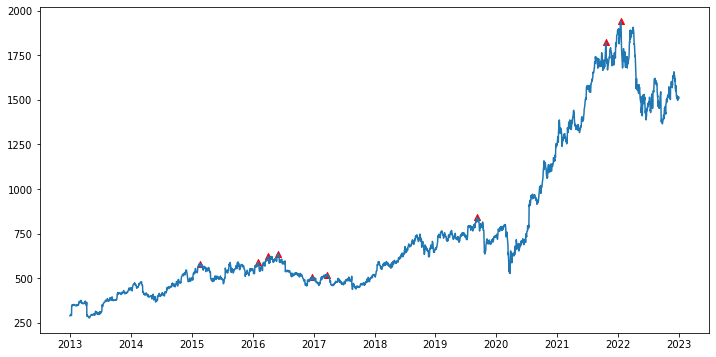

 cup_and_handleGOOGL are 
 Index([391, 432, 1401, 2182, 2237, 2288], dtype='int64')


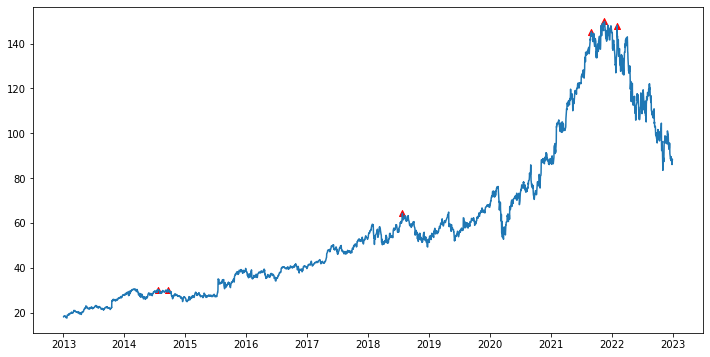

 cup_and_handleMSFT are 
 Index([432, 471, 2238], dtype='int64')


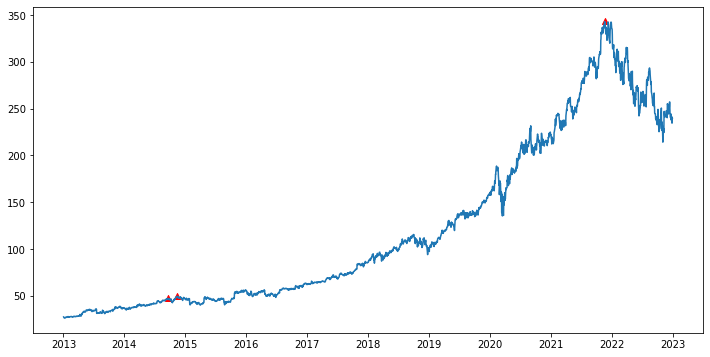

 cup_and_handleADANIGREEN.NS are 
 Index([], dtype='int64')


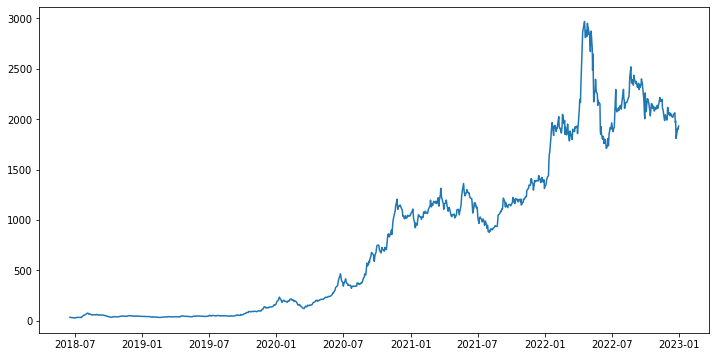

 cup_and_handleRELIANCE.NS are 
 Index([344, 417, 452, 1862, 1898], dtype='int64')


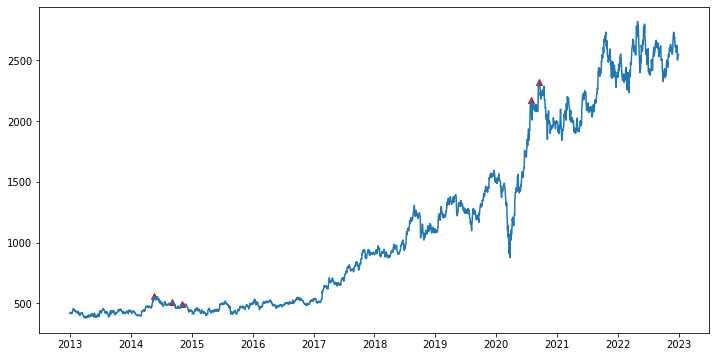

 cup_and_handleTSLA are 
 Index([421, 640, 684, 820, 864, 1127, 1186, 1374, 1409, 1498, 2227, 2267], dtype='int64')


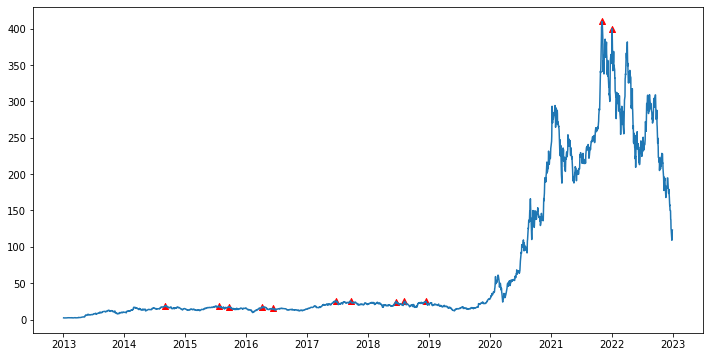

 cup_and_handleSPCE are 
 Index([63, 121, 171, 599, 847, 940], dtype='int64')


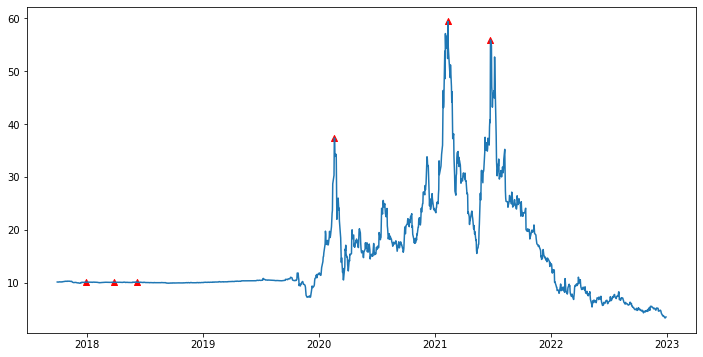

 cup_and_handleAMZN are 
 Index([264, 1428, 1594, 2143, 2186, 2237], dtype='int64')


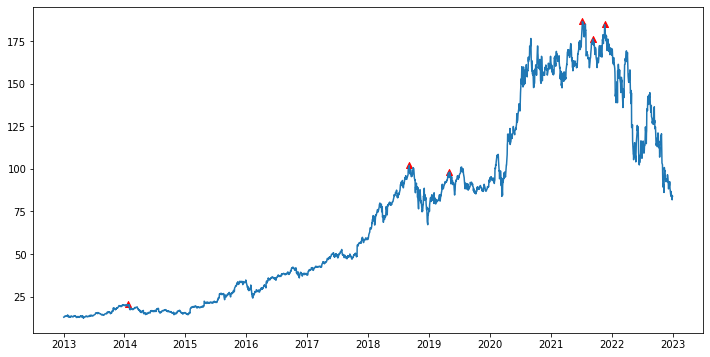

 cup_and_handleNFLX are 
 Index([376, 653, 697, 737, 1388, 1594, 2147, 2236], dtype='int64')


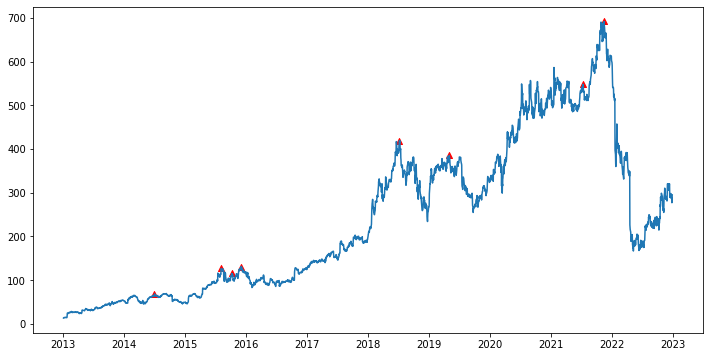

In [13]:
for symbol in symbols:
    index = cup_and_handle(dataframes[symbol])
    print(f' cup_and_handle{symbol} are \n',dataframes[symbol].index[index])

    plt.figure(figsize=(12,6))
    plt.plot(ndataframes[symbol]['Close'])
    plt.scatter(ndataframes[symbol].index[index], ndataframes[symbol]['Close'].iloc[index], marker='^', color='r')
    plt.show()

The rounding_top AAPL are 
 Index([  16,   17,   18,   19,   20,   21,   41,   42,   43,   44,
       ...
       2462, 2463, 2464, 2465, 2466, 2478, 2479, 2480, 2481, 2482],
      dtype='int64', length=1198)


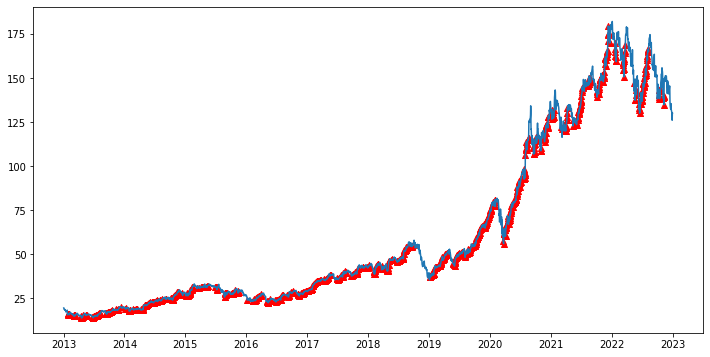

The rounding_top INFY.NS are 
 Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439],
      dtype='int64', length=1098)


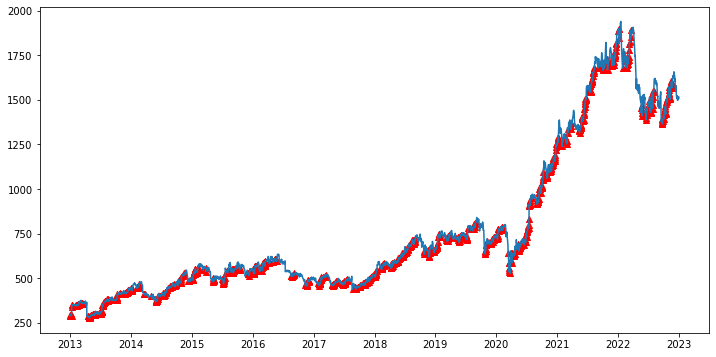

The rounding_top GOOGL are 
 Index([   5,    6,    7,    8,    9,   10,   11,   12,   13,   14,
       ...
       2476, 2477, 2478, 2479, 2480, 2481, 2482, 2487, 2488, 2489],
      dtype='int64', length=1128)


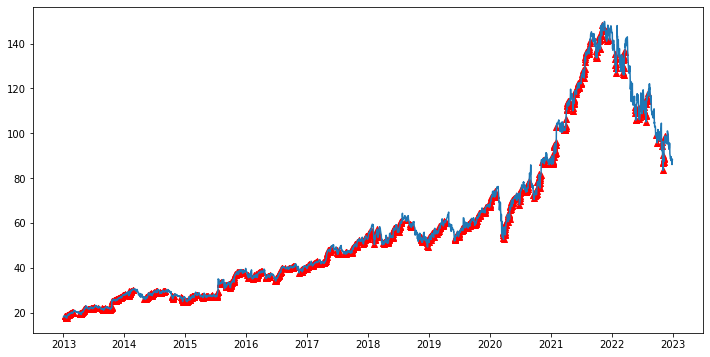

The rounding_top MSFT are 
 Index([   3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
       ...
       2477, 2478, 2479, 2480, 2481, 2482, 2487, 2488, 2489, 2495],
      dtype='int64', length=1206)


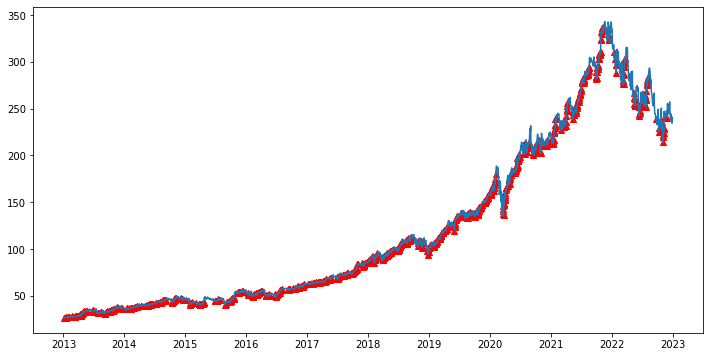

The rounding_top ADANIGREEN.NS are 
 Index([   4,    5,    6,    7,    8,    9,   10,   11,   15,   16,
       ...
       1028, 1042, 1043, 1067, 1074, 1075, 1076, 1077, 1096, 1097],
      dtype='int64', length=521)


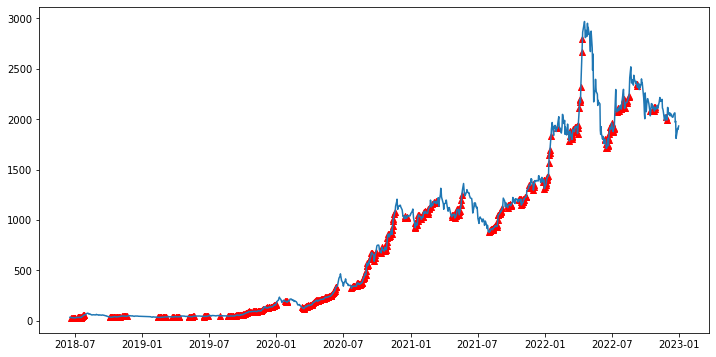

The rounding_top RELIANCE.NS are 
 Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       2424, 2425, 2426, 2434, 2435, 2436, 2437, 2438, 2439, 2440],
      dtype='int64', length=1066)


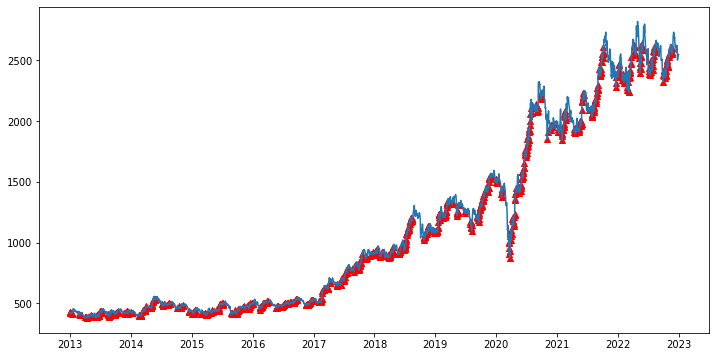

The rounding_top TSLA are 
 Index([   3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
       ...
       2435, 2436, 2462, 2463, 2464, 2465, 2487, 2488, 2489, 2490],
      dtype='int64', length=1119)


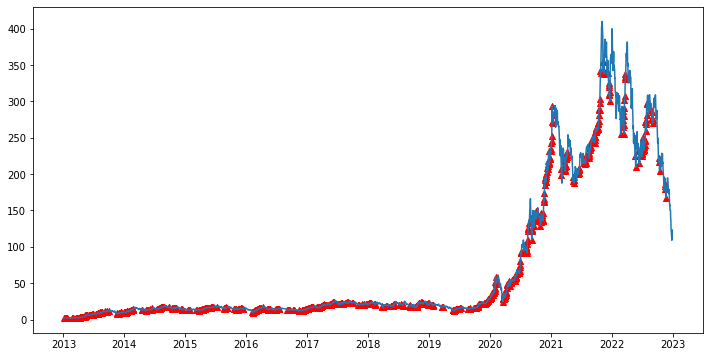

The rounding_top SPCE are 
 Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283],
      dtype='int64', length=449)


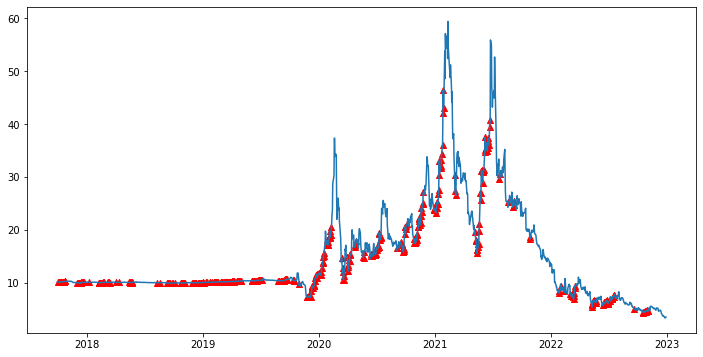

The rounding_top AMZN are 
 Index([   1,    2,    3,    4,    5,    6,   21,   32,   33,   34,
       ...
       2411, 2412, 2448, 2460, 2461, 2477, 2478, 2479, 2480, 2481],
      dtype='int64', length=1163)


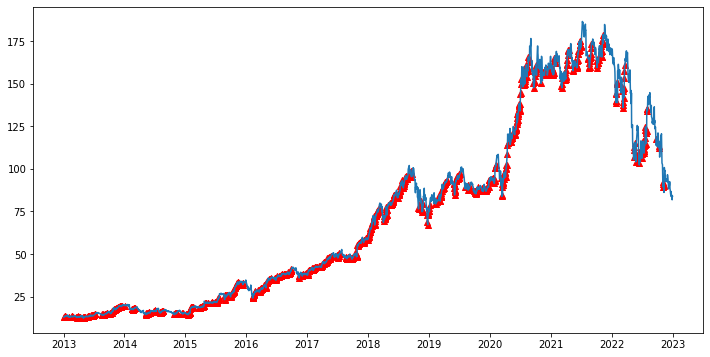

The rounding_top NFLX are 
 Index([   1,    5,    6,    7,    8,    9,   10,   11,   12,   13,
       ...
       2481, 2482, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495],
      dtype='int64', length=1138)


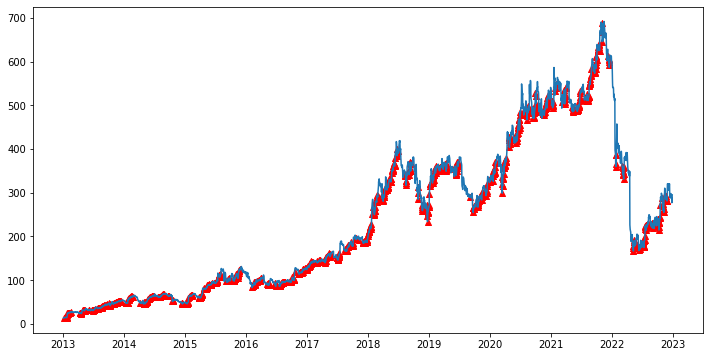

In [14]:
for symbol in symbols:
    index = rounding_top(dataframes[symbol])
    print(f'The rounding_top {symbol} are \n',dataframes[symbol].index[index])

    plt.figure(figsize=(12,6))
    plt.plot(ndataframes[symbol]['Close'])
    plt.scatter(ndataframes[symbol].index[index], ndataframes[symbol]['Close'].iloc[index], marker='^', color='r')
    plt.show()



The head_and_shoulders of AAPL are 
 Index([   1,   35,  102,  106,  137,  163,  169,  172,  179,  189,
       ...
       2394, 2413, 2432, 2455, 2461, 2471, 2486, 2489, 2496, 2508],
      dtype='int64', length=143)


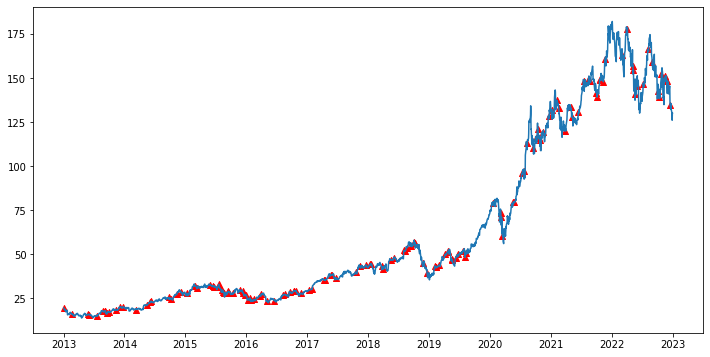

The head_and_shoulders of INFY.NS are 
 Index([  40,   50,   54,   72,  157,  164,  166,  178,  183,  199,
       ...
       2293, 2295, 2299, 2351, 2368, 2373, 2380, 2399, 2427, 2443],
      dtype='int64', length=144)


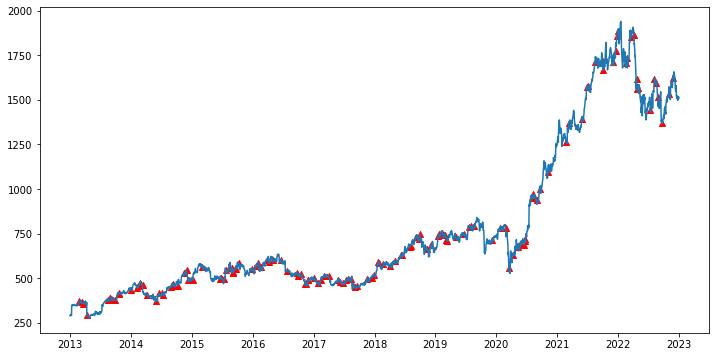

The head_and_shoulders of GOOGL are 
 Index([  16,   18,   25,   43,   49,   58,   92,   97,   99,  117,
       ...
       2442, 2449, 2455, 2465, 2471, 2489, 2496, 2502, 2508, 2510],
      dtype='int64', length=162)


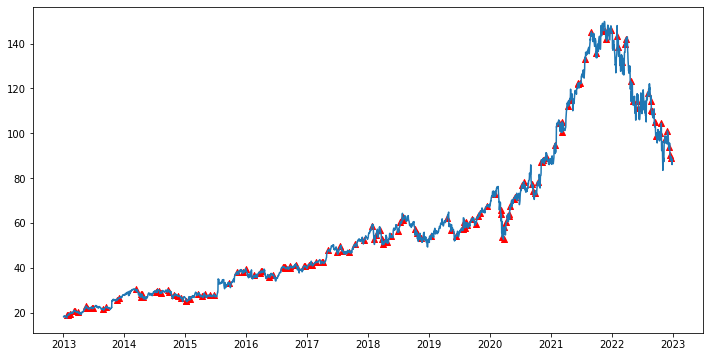

The head_and_shoulders of MSFT are 
 Index([  16,   18,   28,   30,   68,  108,  145,  148,  174,  177,
       ...
       2361, 2377, 2402, 2413, 2430, 2449, 2471, 2483, 2499, 2508],
      dtype='int64', length=157)


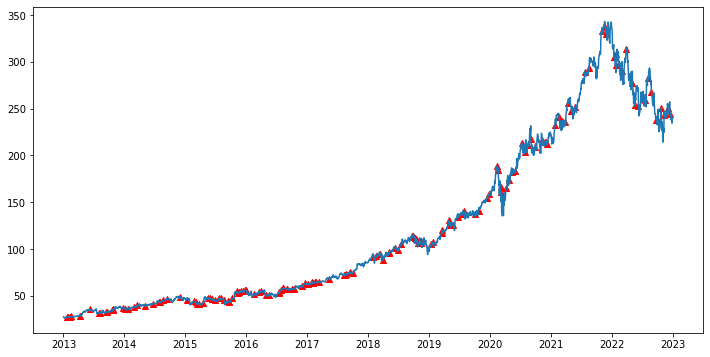

The head_and_shoulders of ADANIGREEN.NS are 
 Index([   2,   65,   99,  112,  126,  133,  169,  196,  223,  238,  245,  256,
        261,  288,  291,  300,  332,  343,  354,  404,  415,  427,  447,  466,
        468,  512,  515,  545,  673,  697,  764,  798,  801,  843,  864,  888,
        907,  909,  912,  925,  942,  945,  947,  962, 1031, 1034, 1045, 1056,
       1062, 1085, 1100, 1109],
      dtype='int64')


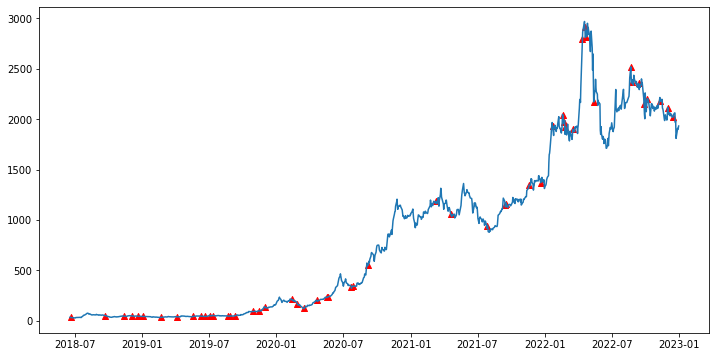

The head_and_shoulders of RELIANCE.NS are 
 Index([   3,   18,   33,   50,  103,  108,  117,  125,  127,  137,
       ...
       2165, 2205, 2221, 2253, 2279, 2284, 2347, 2355, 2394, 2457],
      dtype='int64', length=135)


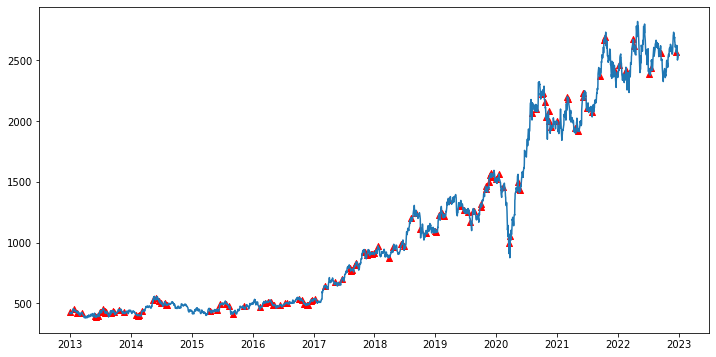

The head_and_shoulders of TSLA are 
 Index([  18,   26,   62,   68,   90,  108,  133,  148,  198,  206,
       ...
       2309, 2337, 2339, 2345, 2355, 2377, 2413, 2432, 2453, 2500],
      dtype='int64', length=149)


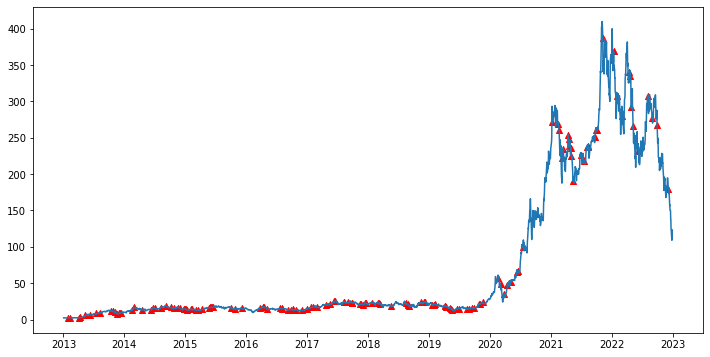

The head_and_shoulders of SPCE are 
 Index([  12,   67,   70,   72,   76,   81,   92,   96,   98,  119,  136,  189,
        364,  366,  398,  430,  463,  581,  600,  610,  625,  672,  678,  686,
        719,  744,  773,  782,  795,  803,  815,  841,  844,  848,  855,  870,
        892,  928,  945,  972,  974,  983,  992, 1004, 1021, 1058, 1067, 1073,
       1081, 1099, 1104, 1114, 1128, 1138, 1142, 1146, 1150, 1173, 1177, 1182,
       1200, 1223, 1231, 1234, 1237, 1245, 1252, 1254, 1258, 1260, 1266, 1275,
       1291, 1294, 1299, 1307, 1315],
      dtype='int64')


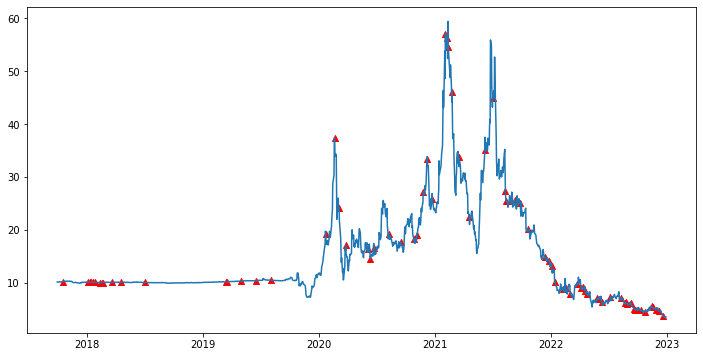

The head_and_shoulders of AMZN are 
 Index([  16,   20,   23,   50,   97,  149,  163,  180,  182,  198,
       ...
       2432, 2442, 2449, 2453, 2461, 2472, 2499, 2502, 2508, 2510],
      dtype='int64', length=157)


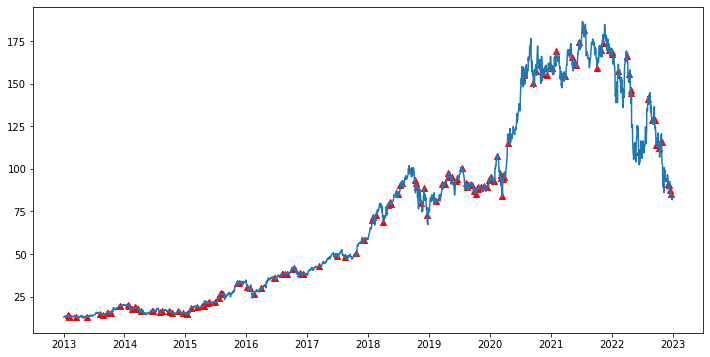

The head_and_shoulders of NFLX are 
 Index([   9,   16,   42,   63,   78,   81,  118,  146,  206,  239,
       ...
       2430, 2432, 2434, 2440, 2453, 2455, 2478, 2489, 2502, 2508],
      dtype='int64', length=162)


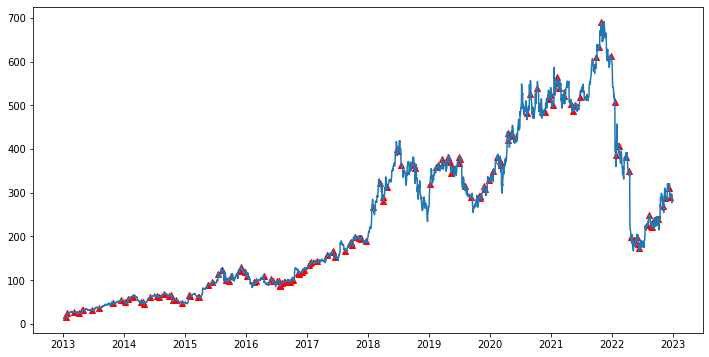

In [15]:
for symbol in symbols:
    index = head_and_shoulders(dataframes[symbol])
    print(f'The head_and_shoulders of {symbol} are \n',dataframes[symbol].index[index])

    plt.figure(figsize=(12,6))
    plt.plot(ndataframes[symbol]['Close'])
    plt.scatter(ndataframes[symbol].index[index], ndataframes[symbol]['Close'].iloc[index], marker='^', color='r')
    plt.show()

